In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/zequnl/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


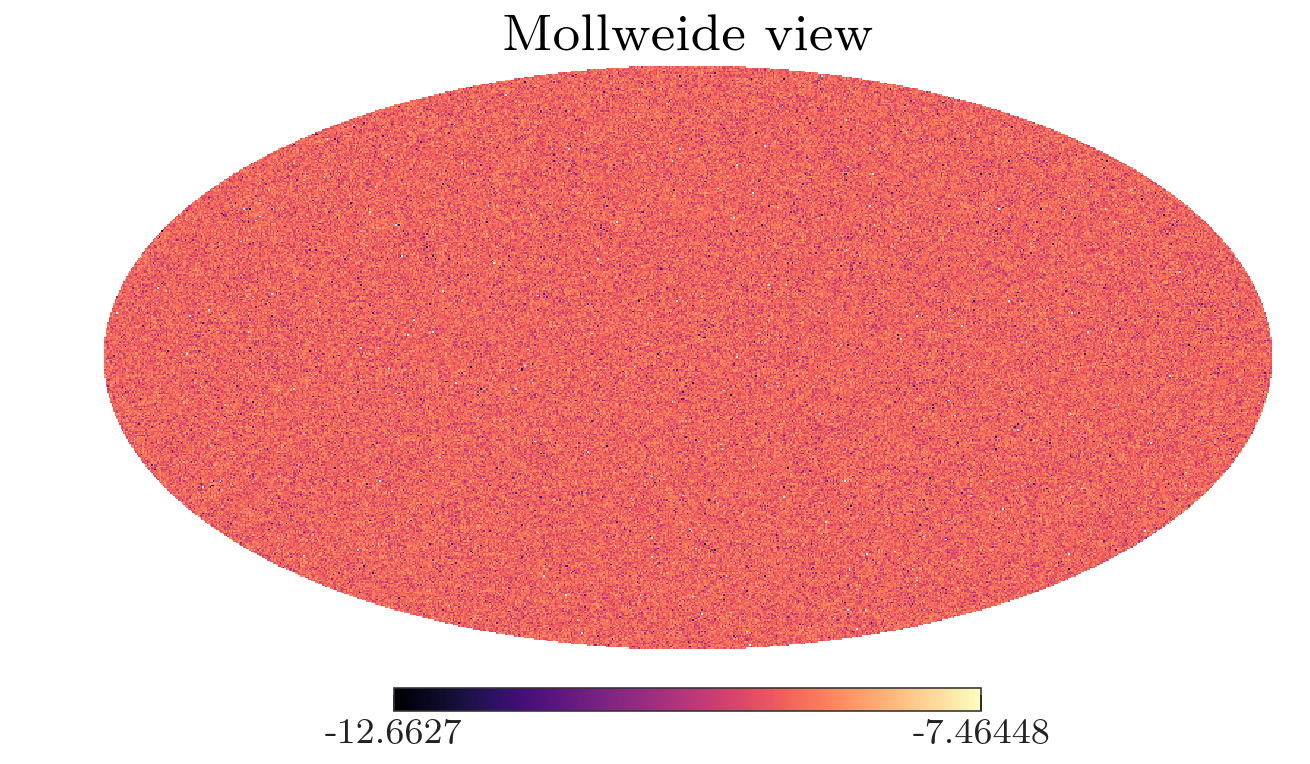

In [2]:
m = hp.read_map('cib100.fits')
hp.mollview( np.log10(m) )

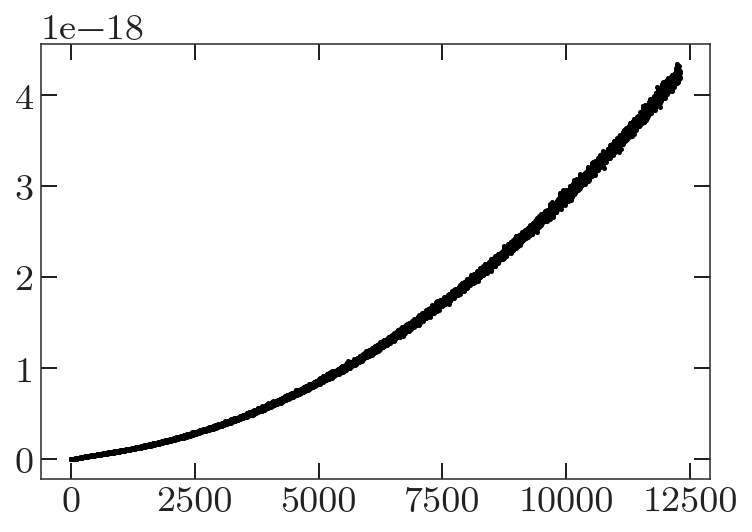

In [3]:
ps = hp.anafast(m, iter=0)
clxg = ps[2:]
ell = np.arange(2,len(ps))
plt.plot(ell, clxg * ell**2)

In [4]:
import so_pysm_models as spm
import pysm
from astropy.io import fits
import scipy

In [5]:
mapfreq = 100.0
nside = 4096
cib = spm.WebSkyCIB(nside=nside)

sky = pysm.Sky({})
sky.add_component(cib)

In [6]:
mwebsky = sky.get_emission(mapfreq * u.GHz)

/home/zequnl/anaconda3/lib/python3.7/site-packages/so_pysm_models-0.4.dev234-py3.7.egg/so_pysm_models/utils/__init__.py:29: UserWarning: Retrieve data for websky/0.3/cib_0100.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


In [7]:
ps_websky = hp.anafast(mwebsky[0].value, iter=0)

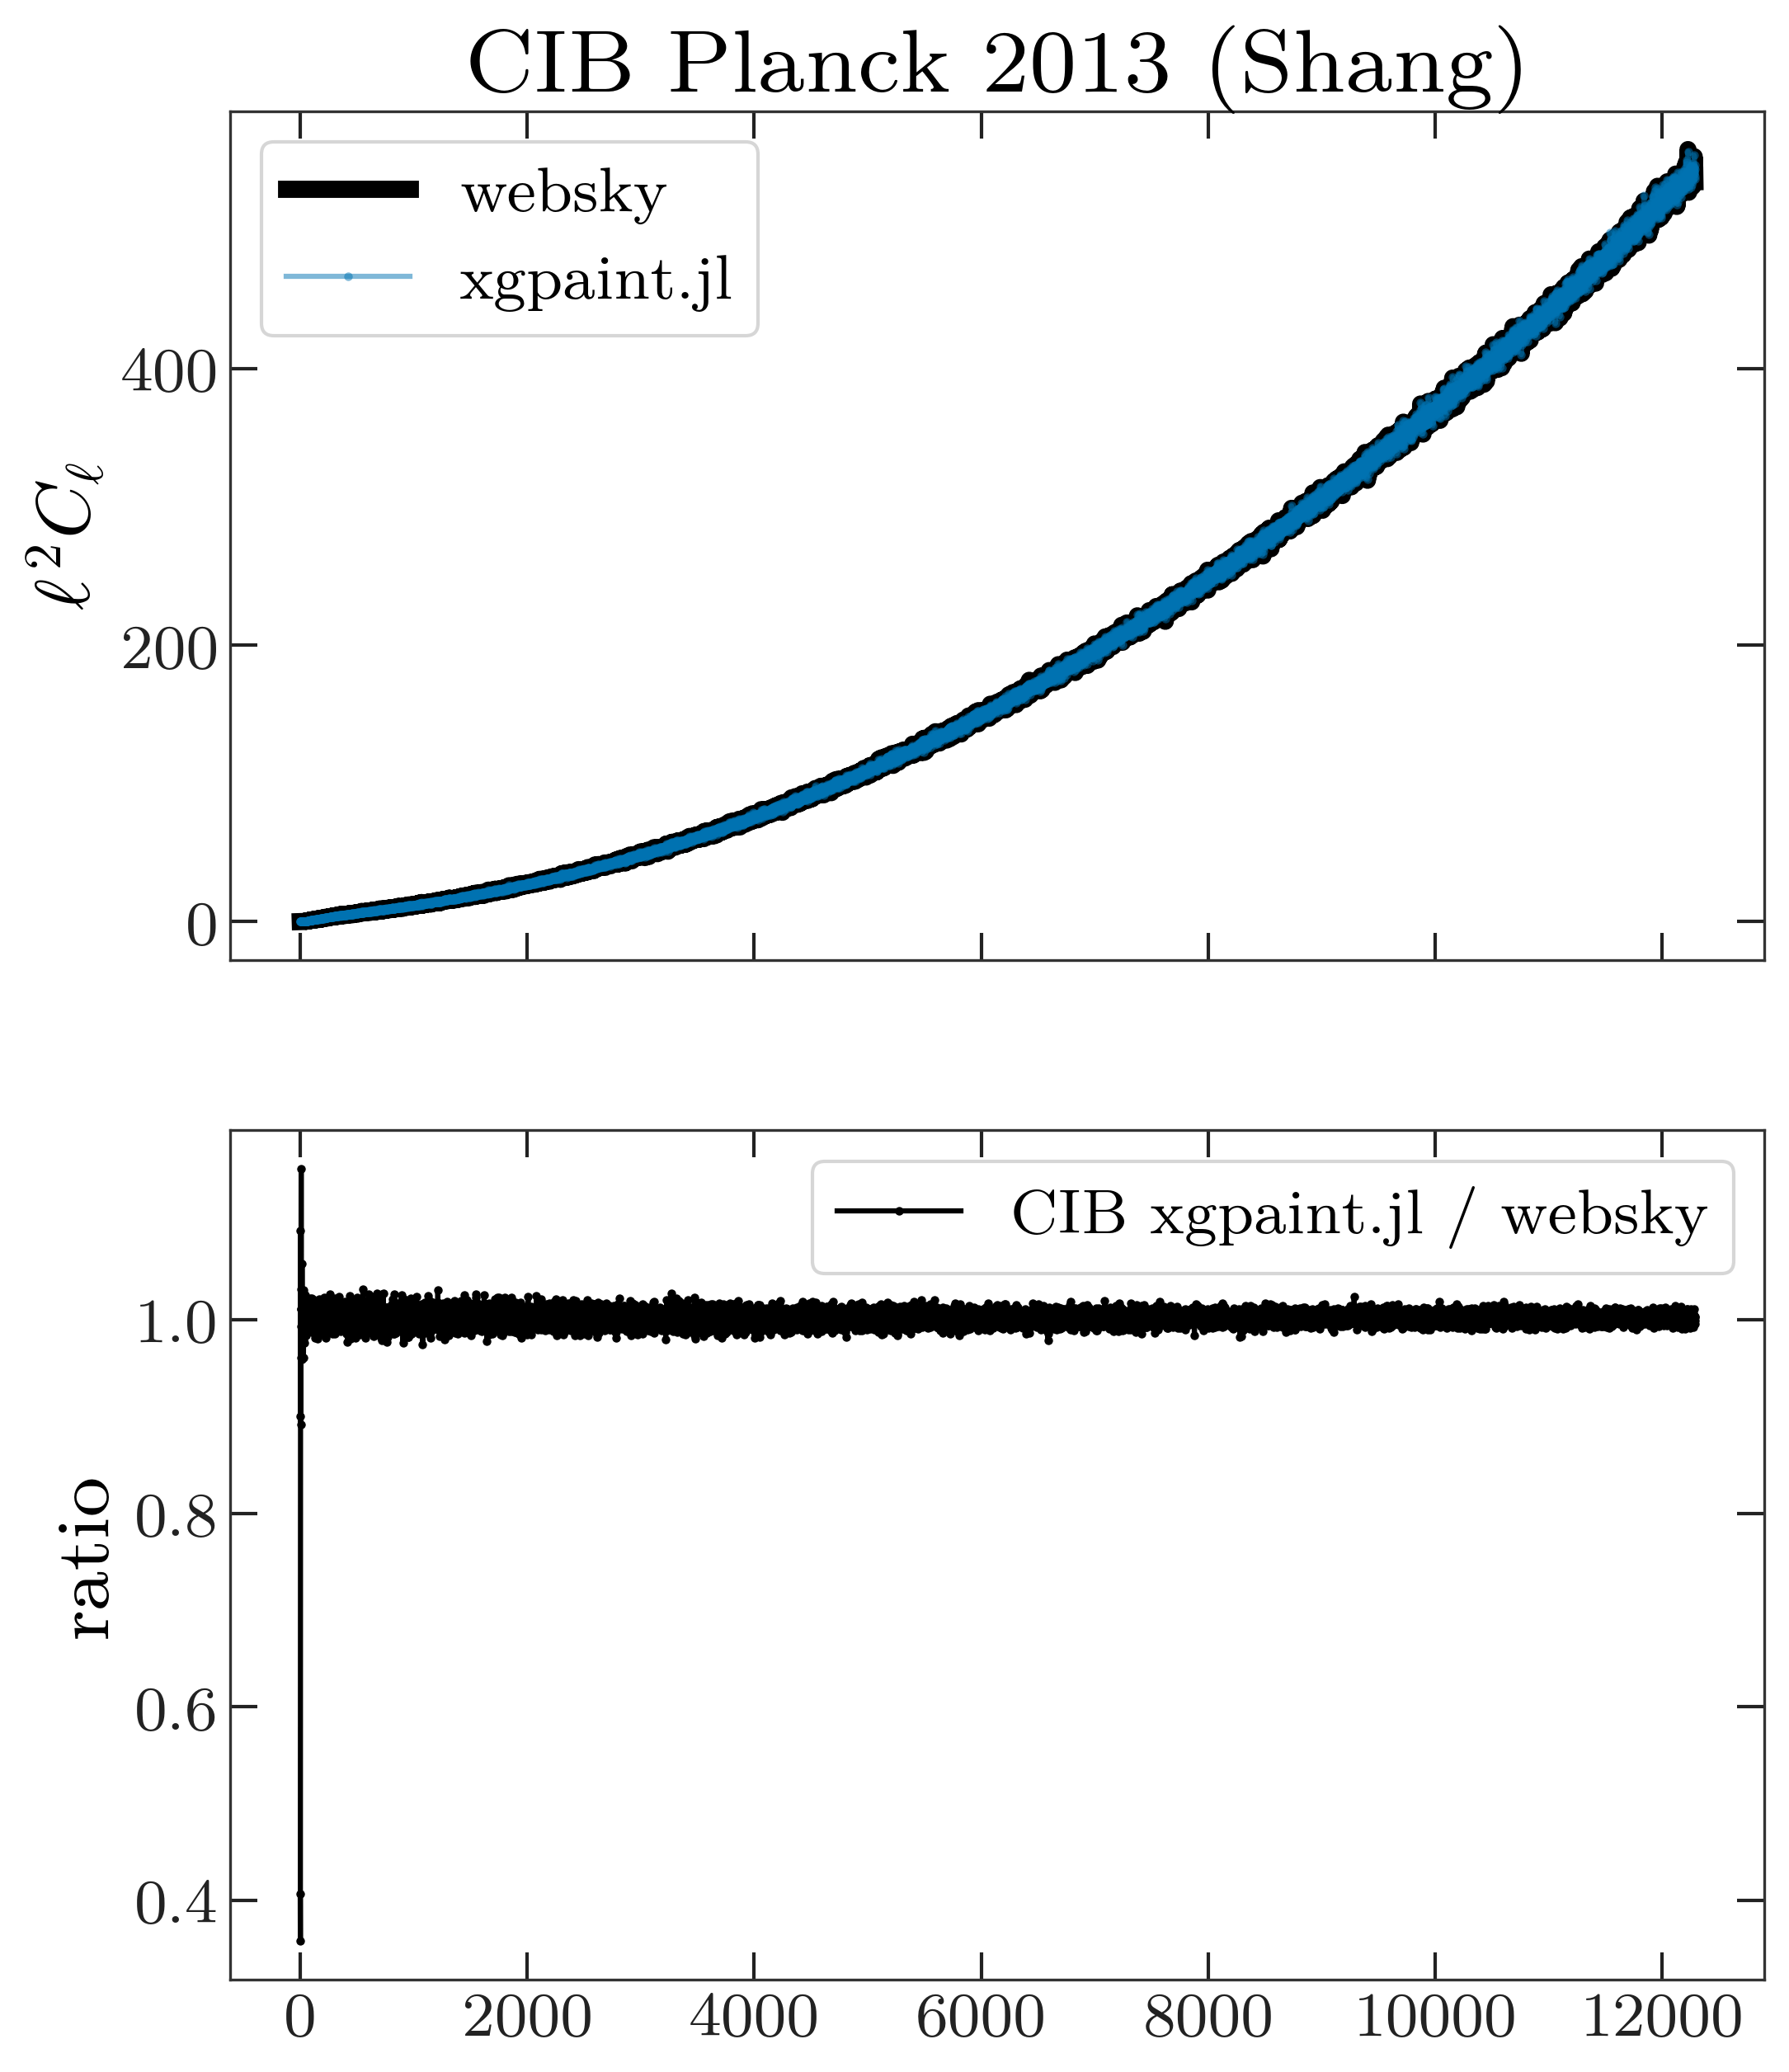

In [8]:
ell = np.arange(2,len(ps_websky))
clw = ps_websky[2:]

fig, ax = plt.subplots(2,1,figsize=(8,10), dpi=150, sharex=True)
ax[0].set_title('CIB Planck 2013 (Shang)')
ax[0].plot(ell, clw * ell**2, lw=5, label="websky")
ax[0].plot(ell, clxg * ell**2 / 0.78e-20, alpha=0.5, label="xgpaint.jl")
ax[0].set_ylabel('$\ell^2 C_{\ell}$')
ax[0].legend()

ax[1].plot(ell, clxg / clw / 0.78e-20, label='CIB xgpaint.jl / websky')
ax[1].set_ylabel('ratio')
ax[1].legend()